# Markov Chains

## 1.1 Definitions and Examples

### Definition

$X_{n}$ is a discrete time **Markov chain** with **transition matrix** $p(i,j)$ if for any $j,i,i_{n-1},\ldots i_{0}$


$P(X_{n+1}=j|X_{n}=i,X_{n-1}=i_{n-1},\ldots,X_{0}=i_{0})=p(i,j)\quad(1.1)$

One more commonly describes a Markov chain by writing down a transition probability $p(i,j)$ with

(i) $p(i,j) \geq 0$, since they are probabilities.

(ii) $\sum_j p(i,j) = 1$, since when $X_n = i$, $X_{n+1}$ will be in some state $j$.

## 1.2 Multistep Transition Probabilities

### Theorem 1.1.

The $m$ step transition probability $P(X_{n+m}=j|X_n=i)$ is the $m$-th power of the transition matrix $p$.

$p^m(i,j) = P(X_{n+m} = j | X_n = i)$

### The Chapman–Kolmogorov equation:

$p^{m+n}(i,j) = \sum_k p^m(i,k) p^n(k,j)\quad(1.2)$

*Proof of (1.2):*

Breaking things down according to the state at time m,

$\begin{aligned}
p^{m+n}(i,j) 
&= P(X_{m+n}=j|X_0=i) \\
&= \sum_k P(X_{m+n}=j, X_m=k|X_0=i) \\
&= \sum_k \frac{P(X_{m+n}=j, X_m=k, X_0=i)}{P(X_0=i)} \\
&= \sum_k \frac{P(X_{m+n}=j, X_m=k, X_0=i)}{P(X_m=k, X_0=i)} \cdot \frac{P(X_m=k, X_0=i)}{P(X_0=i)} \\
&= \sum_k P(X_{m+n}=j|X_m=k, X_0=i) \cdot P(X_m=k|X_0=i) \\
&= \sum_k P(X_{m+n}=j|X_m=k) \cdot P(X_m=k|X_0=i) \\
&= \sum_k p^m(i,k) p^n(k,j)
\end{aligned}$

## 1.3 Classification of States

We are often interested in the behavior of the chain for a fixed initial state, so we will introduce the shorthand

$P_x(A) = P(A | X_0 = x)$

### Stopping Times

The stopping time $ T_y $ represents the first return to state $ y $ after time 0, meaning the process must reach $ y $ for the first time at some $ n \geq 1 $.

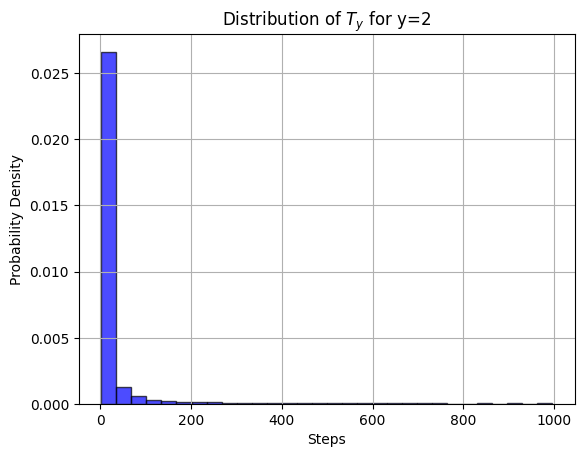

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk(y, steps=1000, num_sim=10000):
    T_y_list = []
    
    for _ in range(num_sim):
        x = y
        t = 0
        
        while t < steps:
            t += 1
            if np.random.rand() < 0.5:
                x -= 1 
            else:
                x += 1  

            if x == y and t > 0:
                T_y_list.append(t)
                break
    
    return T_y_list

y = 2
num_sim = 10000
T_y = random_walk(y, num_sim=num_sim)

plt.hist(T_y, bins=30, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title(f'Distribution of $T_y$ for y={y}')
plt.xlabel('Steps')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()


### Theorem 1.2. Strong Markov property

Suppose $T$ is a stopping time. Given that $ T = n $ and $ X_T = y $, any other information about $ X_0, \ldots, X_T $ is irrelevant for predicting the future, and $ X_{T+k}, k \geq 0 $ behaves like the Markov chain with initial state $ y $.

$P(X_{T+1} = z | X_T = y, T = n) = p(y, z)$

Let $ V_n $ be the set of vectors $(x_0, \ldots, x_n)$ so that if $ X_0 = x_0, \ldots, X_n = x_n $, then $ T = n $ and $ X_T = y $. Breaking things down according to the values of $ X_0, \ldots, X_n $ gives

$V_n = \{ (x_0, x_1, \dots, x_n) \mid X_0 = x_0, X_1 = x_1, \dots, X_n = x_n \Rightarrow T = n, X_T = y\}$

$\Rightarrow P(T = n, X_T = y) = \sum_{x \in V_n} P(X_n = x_n, \dots, X_0 = x_0)$

$\begin{aligned}
P(X_{T+1} = z, X_T = y, T = n) 
&= \sum_{x \in V_n} P(X_{n+1} = z, X_n = x_n, \ldots, X_0 = x_0) \\
&= \sum_{x \in V_n} P(X_{n+1} = z | X_n = x_n, \ldots, X_0 = x_0) P(X_n = x_n, \ldots, X_0 = x_0)\\
&= p(y, z) \sum_{x \in V_n} P(X_n = x_n, \ldots, X_0 = x_0) \\
&= p(y, z) P(T = n, X_T = y)
\end{aligned}$

Dividing both sides by $P(T = n, X_T = y)$ gives the desired result.

Therefore, $P(X_{T+1} = z | X_T = y, T = n) = p(y, z)$.

Let $p_{yy}=P_y(T_y<\infty)$ be the probability $X_n$ returns to $y$ when it starts at $y$, and $T_y = \min\{n \geq 1 : X_n = y\}$.
- $p_{yy}=1$, if we don't exclude $n=0 \Rightarrow T_y = \min\{n \geq 0 : X_n = y\}$.

Let $T_y^1=T_y$ be the time of the first return to $y$, then the time of the $k$-th return to $y$:

$T_{y}^{k} = \min\{n > T_{y}^{k-1} : X_n = y\} \quad (1.3)$ 

$P_y(T^k_y < \infty) = p_{yy}^k \quad (1.4)$

(i) $p_{yy} < 1$: The probability of returning $k$ times is $p_{yy}^k \to 0$ as $k \to \infty$. Thus, eventually the Markov chain does not find its way back to $y$. In this case the state $y$ is called **transient**, since after some point it is never visited by the Markov chain.

$\Leftrightarrow P_y(T_y = \infty)>0\Leftrightarrow 1-p_{yy}>0$

(ii) $p_{yy} = 1$: The probability of returning $k$ times $p_{yy}^k = 1$, so the chain returns to $y$ infinitely many times. In this case, the state $y$ is called **recurrent**, it continually recurs in the Markov chain.

$\Leftrightarrow P_y(T_y = \infty)=0\Leftrightarrow 1-p_{yy}=0$

### 📌 总结
| 状态类型 | 取值范围        | 说明                  |
|----------|----------------|---------------------|
| 常返状态 | $ \{1, 2, 3, \dots\} $ | 一定回得来 |
| 瞬态状态 | $ \{1, 2, 3, \dots\} \cup \{\infty\} $ | 可能回不来 |

### Lemma 1.3.

Suppose $ P_x(T_y \leq k) \geq \alpha > 0 $ for all $ x $ in the state space $ S $. Then  

$
P_x(T_y > nk) \leq (1 - \alpha)^n \to 0 \text{ as }n\to\infty
$

$
P_x(T_y \leq nk) \leq 1 - (1 - \alpha)^n \to 1 \text{ as }n\to\infty
$

- $X_0 = x$
- $ k $ is a fixed number of steps.  
- $ n $ represents how many such $ k $-step blocks we consider.  
- $ nk $ is the total number of steps we analyze.  
- $ P_x(T_y \leq k) \geq \alpha > 0 \Rightarrow P_x(T_y > k) \geq (1-\alpha)$
- $ T_y = \min\{ n \geq 1 : X_n = y \} $ is the first time the Markov chain reaches state $ y $.  
- $ P_x(T_y \leq k) $ is the probability that the chain reaches $ y $ within at most $ k $ steps, starting from $ x $.  
- The assumption $ P_x(T_y \leq k) \geq \alpha > 0 $ means that **from any state $ x $, there is at least a fixed probability $ \alpha $ of reaching $ y $ within $ k $ steps**.  
- $ P_x(T_y > nk) $ is the probability that the chain **has not reached $ y $ after $ nk $ steps**.  

### Definition 1.1.

We say that $ x $ **communicates with** $ y $ and write $ x \to y $ if there is a positive probability of reaching $ y $ starting from $ x $, that is, the probability  

$
p_{xy} = P_x(T_y < \infty) > 0
$

### Lemma 1.4. 
If $x\to y$ and $y\to z$, then $x\to z$.

**Proof:**

Since $x\to y$ with $m$ steps, $p^m(x,y)>0$.

Similarly, $y\to z$ with $n$ steps, $p^n(y,z)>0$.

According to the Chapman–Kolmogorov equation:

$p^{m+n}(i,j) = \sum_k p^m(i,k) p^n(k,j)\quad(1.2)$

Thus, $p^{m+n}(x,z)=\sum_k p^m(x,k) p^n(k,z)\geq p^m(x,y)\cdot p^n(y,z)>0$.

Therefore, $p_{xz}>0$, that is to say: $x\to z$.

### Theorem 1.5.

If $p_{xy}>0$, but $p_{yx}<1$, then $x$ is transient.

**Proof:**

Let $K=\min\{k:p^k(x,y)>0\}$ be the smallest number of steps we can take to get from $x$ to $y$. Since $p^k(x,y)>0$ there must be a sequence $y_1,...,y_{k-1}$ so that

$p(x, y_1) p(y_1, y_2) \cdots p(y_{k-1}, y) > 0$

Since $k$ is minimal all the $y_i\neq x$ (or there would be a shorter path), and we have

$P_x(T_x = \infty) \geq p(x, y_1) p(y_1, y_2) \cdots p(y_{k-1}, y) (1 - p_{yx}) > 0$

so $x$ is transient.

### Lemma 1.6.

If $x$ is recurrent and $p_{xy} > 0$, then $p_{yx} = 1$.

### Proof:

$x$ is recurrent, so $P_x(T_x = \infty)=0$.

$P_x(T_x = \infty) \geq p(x, y_1) p(y_1, y_2) \cdots p(y_{k-1}, y) (1 - p_{yx})$

Since $p(x, y_1) p(y_1, y_2) \cdots p(y_{k-1}, y) > 0$, then

$0 \geq p(x, y_1) p(y_1, y_2) \cdots p(y_{k-1}, y) (1 - p_{yx})$

$\Rightarrow (1 - p_{yx})\leq 0$

$\Rightarrow p_{yx}\geq 1$

$\Rightarrow p_{yx} = 1$

### Theorem 1.7. 
If $C$ is a finite **closed and irreducible** set, then all states in $C$ are **recurrent**.
- A set $A$ is **closed** if it is impossible to get out, i.e., if $i \in A$ and $j \notin A$ then $p(i,j)=0$.
    - In following example 1.14: $\{1,5\}$,$\{4,6,7\}$,$\{1,4,5,6,7\}$,$\{1,3,4,5,6,7\}$,$\{1,2,3,4,5,6,7\}$ are closed sets, but these are too big!
- A set $B$ is called **irreducible** if whenever $i,j\in B, i$ communicates with $j$.
    - In following example 1.14: $\{1,5\}$ and $\{4,5,7\}$ are irreducible closed sets.

- Therefore, A set $ C $ is **closed and irreducible** if it satisfies the following conditions:
    - For all $ i \in C $ and $ j \in S \setminus C $, we have $ p(i, j) = 0 $ (closedness).
    - For all $ i, j \in C $, there exists a number $ k $ such that $ p^k(i, j) > 0 $ (irreducibility).

**Proof:** To prove theorem 1.7, it is sufficient to prove the following two statements:
1. (Lemma 1.9) If $x$ is recurrent and $x \to y$ then $y$ is recurrent
2. (Lemma 1.10) A finite closed set contains at least one recurrent state

**Example 1.14 (A Seven-State Chain).** Consider the transition probability:

$
\begin{array}{cccccc}
  & 1 & 2 & 3 & 4 & 5 & 6 & 7 \\
1 & .7 & 0 & 0 & 0 & .3 & 0 & 0 \\
2 & .1 & .2 & .3 & .4 & 0 & 0 & 0 \\
3 & 0 & 0 & .5 & .3 & .2 & 0 & 0 \\
4 & 0 & 0 & 0 & .5 & 0 & .5 & 0 \\
5 & .6 & 0 & 0 & 0 & .4 & 0 & 0 \\
6 & 0 & 0 & 0 & 0 & 0 & .2 & .8 \\
7 & 0 & 0 & 0 & 1 & 0 & 0 & 0
\end{array}
$

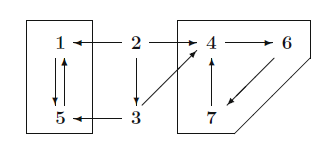

In [ ]:
from IPython.display import Image
Image(filename="..\\Images\\Theorem 1.7.png")

### Theorem 1.8.

If the state space $ S $ is finite, then $ S $ can be written as a disjoint union $ T \cup R_1 \cup \cdots \cup R_k $, where $ T $ is a set of transient states and the $ R_i $, $ 1 \leq i \leq k $, are closed irreducible sets of recurrent states.

### Lemma 1.9. 

If $x$ is recurrent and $x \to y$, then $y$ is recurrent. (Similarly with Lemma 1.6.)

### Lemma 1.10.

In a finite closed set there has to be at least one recurrent state.

### Lemma 1.11.

Let $N(y)$ be the number of visits to $y$ at times $n \geq 1$, then $E_x N(y) = p_{xy} / (1 - p_{yy})$
- $P_x(T_y^k < \infty) = p_{xy}p_{yy}^{k-1}.\quad(1.5)$
- Using (1.5) we can compute $E_x N(y)$.

**Proof:**

$EX = \sum_{k=1}^{\infty} P(X \geq k) \quad(1.6)$

For any nonnegative integer valued random variable $X$, Let $1_{\{X\geq k\}}\sim Bernoulli(p)$, where $p=P(X\geq k)$, denote the random variable that is $1$ if $X\geq k$ and 0 otherwise, thus

$X=\sum_{k=1}^\infty 1_{\{X\geq k\}}$

$E(1_{\{X\geq k\}})=P(X\geq k)$

Therefore, we proved (1.6): $EX = \sum_{k=1}^{\infty} P(X \geq k)$.

The Probability of returning at least $k$ times, $\{N(y)\geq k\}$, is same as the event that the $k$-th return occurs, i.e., $\{T_y^k<\infty\}$, thus

$P_x(N(y)\geq k)=P_x(T_y^k<\infty)$

$\begin{aligned}
E_xN(y)
&=\sum_{k=1}^\infty P_x(N(y)\geq k)\\
&=\sum_{k=1}^\infty P_x(T_y^k<\infty)\\
&=\sum_{k=1}^\infty p_{xy}p_{yy}^{k-1}\\
&=p_{xy}\sum_{k=1}^\infty p_{yy}^{k-1},\quad(\sum_{n=0}^\infty\theta^n=1/(1-\theta))\\
&=\frac{p_{xy}}{1-p_{yy}}
\end{aligned}$

### Lemma 1.12


$E_x(N(y)) = \sum_{k=1}^{\infty} p^k(x, y)$

**Proof:**

Let's set:

$I_{\{X_n=y\}}=
\begin{cases}
&1\quad X_n=y\\
&0\quad X_n\neq y
\end{cases}$

$I_{\{X_n=y\}}\sim Bernoulli(p)$, where $p=P_x(X_n=y)$.

$N(y)=\sum_{n=1}^\infty I_{\{X_n=y\}}$

$E_xN(y)=\sum_{n=1}^\infty P_x(X_n=y)$

### Theorem 1.13.

$y$ is recurrent if and only if

$\sum_{n=1}^\infty p^n(y,y)=E_yN(y)=\infty$


otherwise it is transient.

## 1.4 Stationary Distributions

What happens when the initial state is random?

Suppose we have an initial state distribution $q$ such that

$q(i)=P(X_0=i)$

Thus, we can get

$P(X_n = j) = \sum_i P(X_n = j, X_0 = i) = \sum_i q(i) P(X_n = j \mid X_0 = i)$

Consider the social mobility chain with initial distribution

$q(1) = .5, q(2) = .2, q(3) = .3$. We can observe

$\begin{pmatrix} 0.5 & 0.2 & 0.3 \end{pmatrix} 
\begin{pmatrix} 0.7 & 0.2 & 0.1 \\ 0.3 & 0.5 & 0.2 \\ 0.2 & 0.4 & 0.4 \end{pmatrix} = 
\begin{pmatrix} 0.47 & 0.32 & 0.21 \end{pmatrix}$

where the right hand side gives us the distribution of $X_1$ given initial distribution $q$.

### Definition: Stationary distribution

$qp=\sum_i q(i)p(i,j)$

If $qp = q$, then $q$ is called a stationary distribution. If the distribution at time 0
is the same as the distribution at time 1, then by the Markov property it will be the
distribution at all times $n\geq 1$.

We can also use a special letter $\pi$ to denote solutions of the equation:

$\pi p=\pi$

$\pi p^n=(\pi p) p^{n-1}=\pi$

#### Example 1.17 (Weather Chain). 

To compute the stationary distribution we want to solve

$\begin{pmatrix} \pi_1 & \pi_2 \end{pmatrix} 
\begin{pmatrix} 0.6 & 0.4 \\ 0.2 & 0.8 \end{pmatrix} = 
\begin{pmatrix} \pi_1 & \pi_2 \end{pmatrix}$

$\begin{aligned}
&0.6\pi_1 + 0.2\pi_2 = \pi_1 \\
&0.4\pi_1 + 0.8\pi_2 = \pi_2\\
&\pi_1 + \pi_2 = 1
\end{aligned}$

$\begin{aligned}
\pi_1 &= \frac{0.2}{0.2 + 0.4} = \frac{1}{3} \\
\pi_2 &= \frac{0.4}{0.2 + 0.4} = \frac{2}{3}
\end{aligned}$

### Theorem 1.14.

Suppose that the $k \times k$ transition matrix $p$ is irreducible. Then there is a unique solution to $\pi p = \pi$ with $\sum_{x} \pi_x = 1$ and we have $\pi_x > 0$ for all $x$.


## 1.5 Limit Behavior

### Periodicity

The period of a state x is the largest number that will divide all n such that $p^n(x,x)>0$. Or equivalently, **the greatest common divisor** of 

$I_x=\{n\geq 1: p^n(x,x)\}$

状态 $x$ 的周期定义为 $gcd(I_x)$

A chain where all states have period 1 is called *aperiodic*.

### Lemma 1.16:

If $x$ has period 1, then there is a number $n_0$ such that $n\in I_x$ for all $n\geq n_0$.

### Lemma 1.17:

If $p(x,x)>0$ then $x$ has period 1.

### Lemma 1.18:

If $p_{xy}>0$ and $p_{yx}>0$ then $x$ and $y$ have the same period.

#### **Main Results**

We will now state our main results about the limiting behavior of a Markov chain. Our theorems will rely on some subset of the following four assumptions:

1. $ I: p $ is irreducible  
2. $ A: $ aperiodic, all states have period 1  
3. $ R: $ all states are recurrent  
4. $ S: $ there is a stationary distribution $\pi$

We will use these abbreviations for conciseness in stating our theorems.

### Theorem 1.19 (Convergence Theorem):

Suppose $I,A,S$. Then as $n\to\infty, p^n(x,y)\to\pi(y)$.

#### Example:
使用之前讨论的链：
$
P = \begin{bmatrix}
0.6 & 0.4 \\
0.3 & 0.7
\end{bmatrix}
$
- **$ I $**：不可约（状态 1 和 2 互相可达）。
- **$ A $**：非周期性（状态 1 和 2 的周期为 1，$ I_x = \{1, 2, 3, \dots\} $，GCD = 1）。
- **$ S $**：存在平稳分布 $ \pi = [4/7, 3/7] $，满足 $ \pi P = \pi $ 和 $ \pi(1) + \pi(2) = 1 $。
- 根据 Theorem 1.19：
  - $ p^n(1, 1) \to \pi(1) = 4/7 \approx 0.571 $。
  - $ p^n(1, 2) \to \pi(2) = 3/7 \approx 0.429 $。
  - 类似地，$ p^n(2, 1) \to 4/7 $，$ p^n(2, 2) \to 3/7 $。
- 收敛是单调的、无振荡的，因为链非周期性

### stationary measure

A vector $\mu$ is a stationary measure if

$\sum_x \mu(x) p(x, y) = \mu(y)$

Unlike $\pi$, $\mu$ is not required to be a distribution, though if the state space is finite we can find $\pi$ by normalizing $\mu$:

$
\pi(x) = \frac{\mu(x)}{\sum_x \mu(x)}
$

### Theorem 1.20:

Suppose $I,R.$ Then there is a stationary measure $\mu$ such that $\mu(x)>0$ for all $x$.

### Theorem 1.21 (Asymptotic Fequency): 

Suppose $I,R.$ Let $N_n(y)$ be the number of visits to $y$ up to time $n$. Then

$\frac{N_n(y)}{n}\to\frac{1}{E_y(T_y)}$

- $\frac{N_n(y)}{n}$ is the frequency to visit $y$
- $E_y(T_y)$ is expected the first return from $y$ to $y$

We will see later that if $E_y(T_y)=\infty$ then $\frac{N_n(y)}{n}\to 0$.

### Theorem 1.22:

Suppose $I,S$. Then

$\pi(y)=\frac{1}{E_y(T_y)}$

and thus the stationary distribution is unique.

### Theorem 1.23:

Suppose $I,S$ and $\sum_{x} |f(x)|\pi(x)<\infty$ then

$\frac{1}{n}\sum_{m=1}^{n}f(X_m)\to \sum_{x}f(x)\pi(x)$

Note that Theorems 1.21 and 1.23 do not require aperiodicity.

#### Example: Store inventory 

Suppose a game store sells PS5s, and each day there is demand for 0, 1, 2, or 3 PS5s with probabilities .3, .4, .2, and .1. Each sale produces a profit of $120, but it costs $20 a day to keep unsold units stocked.

The store adopts the following stocking policy: if there are less than 3 units, restock to 3 to start the next day.

Let $X_n=$ $\{0,1,2,3\}$ be the number of units sold each day. 

##### What is the transition matrix?

$P = \begin{bmatrix}
0.3 & 0.4 & 0.2 & 0.1 \\
0.3 & 0.4 & 0.2 & 0.1 \\
0.3 & 0.4 & 0.2 & 0.1 \\
0.3 & 0.4 & 0.2 & 0.1 \\
\end{bmatrix}$

##### What's the stationary distribution of $X_n$?

$\pi(0)=0.3$

$\pi(1)=0.4$

$\pi(2)=0.2$

$\pi(3)=0.1$

##### What's the long run sales profit?

According to Theorem 1.23: $I,S$ and $\sum_{x} |f(x)|\pi(x)<\infty$ then

$\frac{1}{n}\sum_{m=1}^{n}f(X_m)\to \sum_{x}f(x)\pi(x)$

我们需要定义每日利润函数 $f(X_n)$, 基于销售数量

$f(X_m)=120\cdot X_m=f(x)$

长期销售收入$\frac{1}{n}\sum_{m=1}^{n}f(X_m)$:

$\sum_{x}f(x)\pi(x)=0\cdot 120\cdot 0.3+ 1\cdot 120\cdot 0.4+ 2\cdot 120\cdot 0.2+3\cdot 120\cdot 0.1=132$\$

##### What is the long run inventory holding cost?

$h(X_m)=20\cdot(3-X_m)$

$\sum_{x}h(x)\pi(x)=20\cdot 3\cdot 0.3+ 20\cdot 2\cdot 0.4 + 20\cdot 1\cdot 0.2+ 20\cdot 0\cdot 0.1=38$\$

##### What is the long run net profit?

132-38=94$

#### Example: store inventory

Suppose instead the stocking policy is as follows: if there are less than 2 units, restock to 3 to start the next day.

$P = \begin{bmatrix}
0.3 & 0.4 & 0.2 & 0.1 \\
0.3 & 0.4 & 0.3 & 0 \\
0.3 & 0.4 & 0.2 & 0.1 \\
0.3 & 0.4 & 0.2 & 0.1 \\
\end{bmatrix}$

Find the stationary distribution, $\pi p =\pi$

$\pi=(19/110\quad 30/110\quad 40/110\quad 21/110)$

We can apply Theorem 1.23 to compare the long run performance of the two stocking policies.

##### What is the long run sales profit?

$\sum_{x}f(x)\pi(x)=127.64$\$

##### What is the long run inventory holding cost?

$\sum_{x}h(x)\pi(x)=31.45$\$

##### What is the long run net profit?

$127.64-31.45=46.19$\$

#### Lemma 1.26:

If there is a stationary distribution $\pi$, then all states $y$ such that $\pi(y)>0$ are recurrent.

## 1.6 Special Examples

### 1.6.1 Doubly stochastic chains

**Definition 1.2.** 

A transition matrix $p$ is said to be doubly stochastic if its COLUMNS sum to 1, or in symbols $\sum_x p(x,y)=1$.

##### Example: Symmetric reflecting random walk

Consider the state space $\{0, 1, \ldots, L\}$ and let  

$X_t = \max(X_{t-1} - 1, 0) \text{ with probability } 1/2$

$X_t = \min(X_{t-1} + 1, L) \text{ with probability } 1/2$

Suppose $L=4$, transition matrix:

$\begin{array}{llllll} 
& 0 & 1 & 2 & 3 & 4 \\
0 & 1 / 2 & 1 / 2 & 0 & 0 & 0 \\
1 & 1 / 2 & 0 & 1 / 2 & 0 & 0 \\
2 & 0 & 1 / 2 & 0 & 1 / 2 & 0 \\
3 & 0 & 0 & 1 / 2 & 0 & 1 / 2 \\
4 & 0 & 0 & 0 & 1 / 2 & 1 / 2
\end{array}$

### Theorem 1.24:

If $p$ is doubly stochastic transition matrix for a Markov chain with $N$ states, then $\pi(x)=1/N$ for all $x$ is a stationary distribution.

##### Example: Tiny Board Game  

Suppose you play a board game with spaces labeled $\{0, 1, 2, 3, 4, 5\}$. Each turn you roll a die that has 3 sides with 1, 2 sides with 2, 1 side with 3, and move that number of spaces. On the board, 5 is adjacent to 0 so that if you are currently on space $i$ and move $j$ spaces, the result is that you end on space $i + j$ mod 5. What is the transition matrix?

$\begin{array}{lllllll} 
& 0 & 1 & 2 & 3 & 4 & 5\\
0 & 0 & 1 / 2 & 1/3 & 1/6 & 0 & 0 \\
1 & 0 & 0 & 1 / 2 & 1/3 & 1/6 & 0 \\
2 & 0 & 0 & 0 & 1 / 2 & 1/3 & 1/6 \\
3 & 1/6 & 0 & 0 & 0 & 1 / 2 & 1/3\\
4 & 1/3 & 1/6 & 0 & 0 & 0 & 1/2 \\
5 & 1/2 & 1/3 & 1/6 & 0 & 0 & 0 
\end{array}$

### Detailed Balance Condition

$\pi$ is said to satisfy the detailed balance condition for a transition matrix $p$ if for all $x,y$

$\pi(x)p(x,y)=\pi(y)p(y,x)$

Note that this is stronger than $\pi p=\pi$:

$\sum_x\pi(x)p(x,y)=\pi(y)\sum_x p(y,x)=\pi(y)$ (这是平稳分布的定义)

$\pi$ satisfies the detailed balance condition $\Rightarrow$ $\pi$ satisfies stationary distributions.

##### Consider the following transition matrix:

|   | 1   | 2   | 3   |
|---|-----|-----|-----|
| 1 | 0.5 | 0.5 | 0   |
| 2 | 0.3 | 0.1 | 0.6 |
| 3 | 0.2 | 0.4 | 0.4 |

它满足 stationary distribution, since 列之合等于1，$\pi=(1/3,1/3,1/3)$。不满足 Detailed Balance Condition, 因为通过计算 $\pi(1)p(1,3)=\pi(3)p(3,1)$ 我们得出 $\pi(3)=0$ 与事实不符。

#### Example: Ehrenfest Chain

Consider the Ehrenfest chain with 3 balls so the transition matrix is

$\begin{array}{cccc}
 & 0 & 1 & 2 & 3 \\
0 & 0 & 3/3 & 0 & 0 \\
1 & 1/3 & 0 & 2/3 & 0 \\
2 & 0 & 2/3 & 0 & 1/3 \\
3 & 0 & 0 & 3/3 & 0 \\
\end{array}$

What is $\pi$?

Birth and death chains: $\pi(x+1) = \frac{p_x}{q_{x+1}} \cdot \pi(x)$

$\begin{array}{ll}
p(x, x+1) = p_x & \text{for } x < r \\
p(x, x-1) = q_x & \text{for } x > \ell \\
p(x, x) = 1 - p_x - q_x & \text{for } \ell \leq x \leq r
\end{array}$

Set $\pi(0)=c$, thus $\pi(1)=3c,\pi(2)=3c, \pi(3)=c$

$\sum_x\pi(x)=1,c=1/8$

$\pi(0)=1/8$, thus $\pi(1)=3/8,\pi(2)=3/8, \pi(3)=1/8$

Verify $\pi(x)p(x,y)=\pi(y)p(y,x),\forall x,y$, sucessfully:

$\pi$ satisfies stationary distribution.

$\pi$ satisfies the detailed balance condition.


### Reversibility

Consider a Markov Chain with transition matrix $p(i,j)$ and stationary distribution $\pi$. What happens if we watcg the process $X_m,0\leq m\leq n$ in reverse?

**Theorem 1.25:** Fix $ n $ and let $ Y_m = X_{n-m} $ for $ 0 \leq m \leq n $. Then  

$ Y_m $ is a Markov chain with transition probability  

$
\hat{p}(i,j) = P(Y_{m+1} = j|Y_m = i) = \frac{\pi(j)p(j,i)}{\pi(i)}
$

We can verify that $\hat{p}(i,j)$ defines a valid transition matrix:

$\hat{p}(i,j)=\frac{\pi(j)p(j,i)}{\pi(i)}$

$\sum_j \frac{\pi(j) p(j,i)}{\pi(i)}=\frac{1}{\pi(i)}\sum_j \pi(j) p(j,i)=\frac{1}{\pi(i)}(\pi(i))=1$


What happens if $\pi$ satisfies the detailed balance condition?

$\pi(j)p(j,i)=\pi(i)p(i,j),\forall i,j$

$\hat{p}(i,j)=\frac{\pi(j)p(j,i)}{\pi(i)}=\frac{\pi(i)p(i,j)}{\pi(i)}=p(i,j)$

When $\pi$ satisfies the detailed balance condition, we see that $Y_m$ has the same distribution as $X_n$.

A Markov chain with this property (that the distribution is the same when the chain is reversed) is called **reversible**.

The detailed balance condition is a sufficient, but not necessary condiction for a Markov chain to be reversible.
- The detailed balance condition $\Rightarrow$ Markov chain to be reversible.

### Metropolis-Hasting Algorithm

The Metropolis-Hasting algorithm is an algorithm for sampling
from a distribution $\pi(x)$.

The Metropolis-Hasting algorithm is important in Bayesian
statistics as it is commonly used to sample from a posterior
distribution in MCMC (Markov chain Monte Carlo) methods

Begin with a Markov chain with transition matrix $ q(x, y) $ that we call the proposal distribution. We wish to generate a sequence $ X_1, \ldots, X_N $ in the following way. Given $ X_n = x $, we propose the next move $ y $ according to $ q(x, y) $. Next, we define

$
r(x, y) = \min\left(1, \frac{\pi(y) q(y, x)}{\pi(x) q(x, y)}\right)
$

We then flip a coin with probability of heads $ r(x, y) $:

- If heads, set $ X_{n+1} = y $ (accept the new move).
- If tails, set $ X_{n+1} = x $ (reject the new move).

Generating the sequence $ X_1, \ldots, X_N $ in this way results in a Markov chain with transition probabilities

$
p(x, y) = q(x, y) r(x, y)
$

We can verify that the distribution $\pi$ satisfies **the detailed balance condition** for $ p(x, y) $:

Suppose that $\pi(y)q(y,x) > \pi(x)q(x,y)$. In this case:

$\pi(x)p(x,y) = \pi(x)q(x,y) \cdot 1$

$\pi(y)p(y,x) = \pi(y)q(y,x) \frac{\pi(x)q(x,y)}{\pi(y)q(y,x)} = \pi(x)q(x,y) = \pi(x)p(x,y)$



To generate samples from $\pi(x)$

1. Run the chain defined by $p(x, y)$ for a long time until it reaches equilibrium to obtain a single sample.
2. Repeat 1. by taking samples at widely separated times.

The question of how long is a sufficiently "long time" is not always easy to answer.

We can also use Theorem 1.23 to compute expected values of functions of $X \sim \pi(x)$, since this theorem tells us

$
\frac{1}{n}\sum_{m=1}^{n} f(X_m) \to \sum_{x} f(x)\pi(x)
$

### Example: Geometric distribution

Consider the geometric distribution with success probability $\theta$, so

$\pi(x)=\theta(1-\theta)^{x-1},x=1,2,...$

$q(x,y)=
\begin{cases}
1/2 \quad & |x-y|=1 \\
0   \quad & otherwise
\end{cases}$

$r(x,y)=
\begin{cases}
\frac{\theta(1-\theta)^{y-1}}{\theta(1-\theta)^{x-1}} \quad & |x-y|=1\\
0   \quad & otherwise
\end{cases}$

Why is the Metropolis-Hastings Algorithm useful in Bayesian statistics?

Consider the problem of inference for a parameter θ after observing data

$Y_1,...,Y_n\sim$ iid $f(y|\theta)$

Bayesian statistics begins with a prior distribution on $\theta, h(\theta)$, and expresses belief about the parameter $\theta$ after observing the data by the posterior

$g(\theta|Y_1,...,Y_n)=\frac{f(\mathbf{Y}|\theta)h(\theta)}{\sum_\theta f(\mathbf{Y}|\theta)h(\theta)}$

However, in many cases the denominator $\sum_\theta f(\mathbf{Y}|\theta)h(\theta)$ is difficult to compute. In particular, if $\theta$ is a high dimensional quantity or if $\theta$ takes on continuous values in which case we replace the sum by an integral and 

$\int_\theta f(\mathbf{Y}|\theta)h(\theta)$

may not have a closed form solution

To see why Metropolis-Hastings is useful here, set

$\pi(\theta)=\frac{f(\mathbf{Y}|\theta)h(\theta)}{\sum_\theta f(\mathbf{Y}|\theta)h(\theta)}$

Now for any $q(\theta,\theta')$ we might choose we can observe

$r(\theta,\theta')=\min\big(\frac{\pi(\theta')q(\theta',\theta)}{\pi(\theta)q(\theta,\theta')},1\big)$

#### Example: 
Suppose $k$-sided die is rolled $10$ times. $k$ is unknown, but a priori we believe $P(k = 4) = P(k = 6) = P(k = 8) = 1/3$. Of the $10$ rolls, $4$ are $1s$. What is the posterior distribution of $k$?

$\begin{aligned}
P(k|x=4)=\frac{P(x=4|k)P(k)}{\sum_{k\in\{4,6,8\}}P(x=4|k)P(k)}=\pi(k|x=4)
\end{aligned}$

How can we use the M-H algorithm to sample from the posterior of $k=\theta$?

$q(\theta,\theta')=
\begin{cases}
1/3\quad &\theta'=4,6,8\\
0\quad &otherwise
\end{cases}$

$r(\theta,\theta')=\min(\frac{\pi(\theta')q(\theta',\theta)}{\pi(\theta)q(\theta,\theta')},1)=\min(\frac{P(x=4|k=\theta')P(k=\theta')q(\theta',\theta)}{P(x=4|k=\theta)P(k=\theta)q(\theta,\theta')},1)=\min(\frac{\binom{10}{4}(1/\theta')^4(1-1/\theta')^6\cdot (1/3)\cdot (1/3)}{\binom{10}{4}(1/\theta)^4(1-1/\theta)^6\cdot (1/3)\cdot (1/3)},1)=\min(\frac{(1/\theta')^4(1-1/\theta')^6}{(1/\theta)^4(1-1/\theta)^6},1)$

## 1.8 Exit Distribution

### Example: 2 years college 

At a local two year college, 60% of fresh men become sophomores, 25% remain freshmen, and 15% drop out. 70% of sophomores graduate and transfer to a four year college, 20% remain sophomores and 10% drop out. What fraction of new students eventually graduate?

Let’s begin with the transition matrix:

$\begin{array}{cccc}
& 1 & 2 & G & D \\
1 & 0.25 & 0.6 & 0 & 0.15 \\
2 & 0 & 0.2 & 0.7 & 0.1 \\
G & 0 & 0 & 1 & 0 \\
D & 0 & 0 & 0 & 1 \\
\end{array}$

What is the fraction of new students eventually graduate?
- Let $h(x)$ be the probability that a student currently in state $x$ eventually graduates.

    $h(1)=0.25h(1)+0.6h(2)$

    $h(2)=0.2h(2)+0.7$

    $h(1)=0.7$

### Example 1.40. Tennis. 

In tennis the winner of a game is the first player to win four points, unless the score is 4−3, in which case the game must continue until one player is ahead by two points and wins the game. Suppose that the server win the point with probability 0.6 and successive points are independent.

$\begin{array}{cc|cccc}
 & 2 & 1 & 0 & -1 & -2 \\
2 & 1 & 0 & 0 & 0 & 0 \\
\hline
1 & .6 & 0 & .4 & 0 & 0 \\
0 & 0 & .6 & 0 & .4 & 0 \\
-1 & 0 & 0 & .6 & 0 & .4 \\
\hline
-2 & 0 & 0 & 0 & 0 & 1 \\
\end{array}$

- Let $h(x)$ be the probability of the server winning when the score is $x$ then

    $h(x)=\sum_y p(x,y)h(y)$

    where $h(2)=1$ and $h(-2)=0$.

    $h(1) = .6 + .4h(0)$

    $h(0) = .6h(1) + .4h(-1)$

    $h(-1) = .6h(0)$

    $h(0) = 0.6923, h(1)=0.8769, h(-1)=0.4154$

- General case: What if the serving player wins each point with probability $w$?

    Suppose that the server wins each point with probability $w$

    If at this time, the game is tied, after $2$ points, the server will have won with probability $w^2$, lose with $(1-w)^2$, and returned to a tied game with probability $2w(1-w)$, so $h(0)=w^2+2w(1-w)h(0)$.

    $h(0)=\frac{w^2}{w^2+(1-w)^2}$

**Theorem 1.27:** Suppose $ X_n $ is a Markov chain on a finite state space $ S $. Let $ a, b \in S $, $ C = S - \{a, b\} $, and  
$ V_x = \min\{n \geq 1, X_n = x\} $ for each $ x \in S $. Suppose  
$ h(a) = 1, h(b) = 0 $, and  

$
h(x) = \sum_y p(x, y)h(y)
$

Then if $ P_x(\min\{V_a, V_b\} < \infty) > 0 $ for all $ x \in C $, then  

$
h(x) = P_x(V_a < V_b)
$
- $h(x)$ 是从状态 $x$ 开始，链先到达 $a$ 而不是 $b$ 的概率。

**Example:** Bob, who has 15 pennies, and Charlie, who has 10 pennies, decide to play a game. They each flip a coin. If the two coins match, Bob gets the two pennies (for a profit of 1). If the two coins are different, then Charlie gets the two pennies. They quit when someone has all the pennies. What is the probability Bob will eventually have all the pennies?

Let $ X_n $ be the number of pennies Bob has after $ n $ rounds. Note this is a fair game in the sense that

$E_x(X_1)=0.5(x+1)+0.5(x-1)=x$

The expected number he has at the end of the game should be the same as at the begining so:

$x=NP_x(V_N<V_0)+0P_x(V_0<V_N)$

$P_x(V_N<V_0)=h(x)=x/N$

To prove this note that by considering what happens on the first step

$h(x)=0.5h(x+1)+0.5h(x-1)$

Thus,

$h(x+1)-h(x)=h(x)-h(x-1)$

It means, $h$ has costant slope and $h(0)=0$ and $h(N)=1$, so $h(x)=x/N$.

For an example of an unfair game we return to our Gambler's Ruin. Suppose we have a Gambler's Ruin with $ N $ and $ p \neq 1/2 $. We can consider the probability that starting from $ \$x $, the gambler reaches $ \$N $ before going bankrupt. We will let

$
h(x) = P(V_N < V_0)
$

and note that $ h(N) = 1 $ and $ h(0) = 0 $. We now consider $ h(x) $ for $ 0 < x < N $.

$h(x)=p(h(x+1))+(1-p)h(x-1)$

$h(x+1)-h(x)=\frac{1-p}{p}(h(x)-h(x-1))$

$c=h(1)-h(0)=h(1)$

$h(x+1)-h(x)=c(\frac{1-p}{p})^{x}$

$\sum_{x=0}^{N-1}(h(x+1)-h(x))=h(N)-h(0)=1$

$\sum_{x=0}^n a^x=\frac{1-a^{n+1}}{1-a}$

$\theta = \frac{1-p}{p}$

$\sum_{x=0}^{N-1}(h(x+1)-h(x))=c\sum_{x=0}^{N-1}(\frac{1-p}{p})^{x}=c\cdot\frac{1-\theta^N}{1-\theta} = 1$

$c=\frac{1-\theta}{1-\theta^N}$

$h(x)-h(0)=c\cdot\frac{1-\theta^x}{1-\theta}$

$h(x)=\frac{(\frac{1-p}{p})^x-1}{(\frac{1-p}{p})^N-1}$



For an example of an unfair game we return to our Gambler's Ruin. Suppose we have a Gambler's Ruin with $ N $ and $ p \neq 1/2 $. We can consider the probability that starting from $ \$x $, the gambler reaches $ \$N $ before going bankrupt. We will let

$
h(x) = P(V_N < V_0)
$

and note that $ h(N) = 1 $ and $ h(0) = 0 $. We now consider $ h(x) $ for $ 0 < x < N $.

$\theta=(1-p)/p=10/9$

$h(x=50)=\frac{(10/9)^{50}-1}{(10/9)^{100}-1}=0.005128$

## 1.9 Exit Times



**Example 1.45. Two year college.** In Example 1.39 we introduced a Markov chain with state space $ 1 = \text{freshman}, \, 2 = \text{ sophomore}, \, G = \text{graduate}, \, D = \text{dropout}, $ and transition probability

$
\begin{array}{ccccc}
& 1 & 2 & G & D \\
1 & 0.25 & 0.6 & 0 & 0.15 \\
2 & 0 & 0.2 & 0.7 & 0.1 \\
G & 0 & 0 & 1 & 0 \\
D & 0 & 0 & 0 & 1 \\
\end{array}
$

On the average how many years does a student take to graduate or drop out?

Let $ g(x) $ 表示从状态 $x$ 开始，到达吸收状态（毕业$G$或辍学$D$）的期望时间. $ g(G) = g(D) = 0 $. By considering what happens on one step

$
g(1) = 1 + 0.25g(1) + 0.6g(2)
$

$
g(2) = 1 + 0.2g(2)
$

时间加1（因为每一步代表一年）. To solve for $ g $, we note that the second equation implies $ g(2) = 1/0.8 = 1.25 $ and then the first that

$
g(1) = \frac{1 + 0.6(1.25)}{0.75} = \frac{1.75}{0.75} = 2.3333
$

Given a Markov chain $ X_n $ on a state space $ S $ with one or more absorbing states, we might be interested in the time until $ X_n $ eventually reaches some absorbing state $ a $.

We will call this the **exit time**. For now we will consider another example.

Example: In a game of tennis, the first player to 4 points wins, with the stipulation that one must win by at least 2 point. Suppose a game of tennis is tied 3-3, the serving player wins each point, and successive points are independent. What is the expected time until the game ends?

$\begin{array}{cc|cccc}
 & 2 & 1 & 0 & -1 & -2 \\
2 & 1 & 0 & 0 & 0 & 0 \\
\hline
1 & .6 & 0 & .4 & 0 & 0 \\
0 & 0 & .6 & 0 & .4 & 0 \\
-1 & 0 & 0 & .6 & 0 & .4 \\
\hline
-2 & 0 & 0 & 0 & 0 & 1 \\
\end{array}$

Same methods

### **Theorem 1.28:** 

Let $ X_n $ be a Markov chain on finite state space $ S $. Let $ A \subset S $ and $ V_a = \inf\{n \geq 0 : X_n \in A\} $. Suppose $ C = S - A $ is finite and $ P_X(V_a < \infty) > 0 $ for all $ x \in C $. Let $ g(a) = 0 $ for all $ a \in A $ and for all $ x $ in $ C $

$
g(x) = 1 + \sum_y p(x, y)g(y)
$

Then $ g(x) = E_X(V_A) $.

### **Example: Waiting time for TT** 

Suppose we flip a fair coin repeatedly. Let $T_{TT}$ be the (random) number of flips needed to observe two tails in a row. We want to find $E(T_{TT})$.

$\begin{array}{c|ccc}
 & 0 & 1 & 2 \\
\hline
0 & 1/2 & 1/2 & 0 \\
1 & 1/2 & 0 & 1/2 \\
2 & 0 & 0 & 1 \\
\end{array}$

$g(0) = 1 + .5g(0) + .5g(1)$

$g(1) = 1 + .5g(0)$

$g(0)=6, g(1)=4$

$E_0(V_{TT})=6$

### Example:

Bob, who has 15 pennies, and Charlie, who has 10 pennies, decide to play a game. They each flip a coin. If the two coins match, Bob gets the two pennies (for a profit of 1). If the two coins are different, then Charlie gets the two pennies. They quit when someone has all the pennies. What is the expected time until someone has all the pennies?

Let $\tau = \min\{n: X_n \in \{0, N\}\}$ be the first time someone has all the pennies. We claim

$
E_x(\tau) = x(N-x)
$

**Proof:**

**Case 1 fair game: p = 0.5**

$g(N)=0$

$g(0)=0$

$g(x)=1+0.5g(x+1)+0.5g(x-1)$

$g(x+1)-g(x)=g(x)-g(x-1)-2$

Set $g(1)-g(0)=c=g(1)$

$g(2)-g(1)=c-2\cdot 1$

$g(3)-g(2)=c-2\cdot 2$

$\vdots$

$g(x+1)-g(x)=c-2\cdot x$

$\sum_{x=0}^{N-1}g(x+1)-g(x)=g(N)-g(0)=0$

$\sum_{x=0}^{N-1}g(x+1)-g(x)=\sum_{x=0}^{N-1} (c-2\cdot x)=(N)c-2\cdot\frac{(N)(N-1)}{2}=0$

$c=N-1$

$g(x)-g(0)=(x)\cdot (N-1)-2\cdot\frac{(x)(x-1)}{2}$

$g(x)=x(N-x)=E_x\tau$

**Case 2 unfair game: p $\neq$ 0.5**

$p+q=1$

$g(N)=0$

$g(0)=0$

$g(x)=1+pg(x+1)+qg(x-1)$

$g(x+1)-g(x)=g(x)-g(x-1)-2$

$g(x)=\frac{x}{q-p}- \frac{N}{q-p} \left[ \frac{1-(q/p)^x}{1-(q/p)^N} \right]= E_x\tau$



### Example:

For a concrete example of this we can consider roulette. Suppose we bring $50 to a casino with the goal of winning $100 before we go bankrupt. If we bet $1 on red each spin, then \( p = 18/38 \) since there are

- 18 red spaces
- 18 black spaces
- 2 green spaces (0 and 00)

How long do we expect to play until we reach $100 or go bankrupt?

套公式

## 1.10 Infinite State Spaces

See ppt MATH_497_DiscreteMarkov7_annotated.pdf
